# Examples of workflow plots

In [48]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

### Workflow selection

In [49]:
output_dir = '../filtered_workloads_1s'

In [55]:
idx = 29
file_path = os.path.join(output_dir, f'{idx}.csv')
df = pd.read_csv(file_path)

## Power usage

In [54]:
df

,timestamp,power_draw_W,memory_free_MiB,memory_used_MiB,utilization_memory_pct,utilization_gpu_pct,id_user,cpus_req,mem_req,gres_used,nodes_alloc,timelimit,time_submit,time_start,time_end,time_eligible
0,0,35.516456,32510.000000,0.000000,0.000000,0.000000,6.690351e+13,8.0,60000.0,0.0,1.0,10080.0,1.623958e+09,1.624015e+09,1.624144e+09,1.623958e+09
1,1,31.677778,32510.000000,0.000000,0.000000,0.000000,6.690351e+13,8.0,60000.0,0.0,1.0,10080.0,1.623958e+09,1.624015e+09,1.624144e+09,1.623958e+09
2,2,31.577144,32510.000000,0.000000,0.000000,0.000000,6.690351e+13,8.0,60000.0,0.0,1.0,10080.0,1.623958e+09,1.624015e+09,1.624144e+09,1.623958e+09
3,3,31.462422,32510.000000,0.000000,0.000000,0.000000,6.690351e+13,8.0,60000.0,0.0,1.0,10080.0,1.623958e+09,1.624015e+09,1.624144e+09,1.623958e+09
4,4,31.363622,32509.080000,0.920000,0.000000,0.000000,6.690351e+13,8.0,60000.0,0.0,1.0,10080.0,1.623958e+09,1.624015e+09,1.624144e+09,1.623958e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12891,12891,46.635356,31215.000000,1295.000000,1.627778,13.665556,6.690351e+13,8.0,60000.0,0.0,1.0,10080.0,1.623958e+09,1.624015e+09,1.624144e+09,1.623958e+09
12892,12892,44.331689,31215.000000,1295.000000,0.742222,6.247778,6.690351e+13,8.0,60000.0,0.0,1.0,10080.0,1.623958e+09,1.624015e+09,1.624144e+09,1.623958e+09
12893,12893,42.383522,31216.800000,1293.200000,0.000000,0.000000,6.690351e+13,8.0,60000.0,0.0,1.0,10080.0,1.623958e+09,1.624015e+09,1.624144e+09,1.623958e+09
12894,12894,42.332989,31233.000000,1277.000000,0.000000,0.000000,6.690351e+13,8.0,60000.0,0.0,1.0,10080.0,1.623958e+09,1.624015e+09,1.624144e+09,1.623958e+09


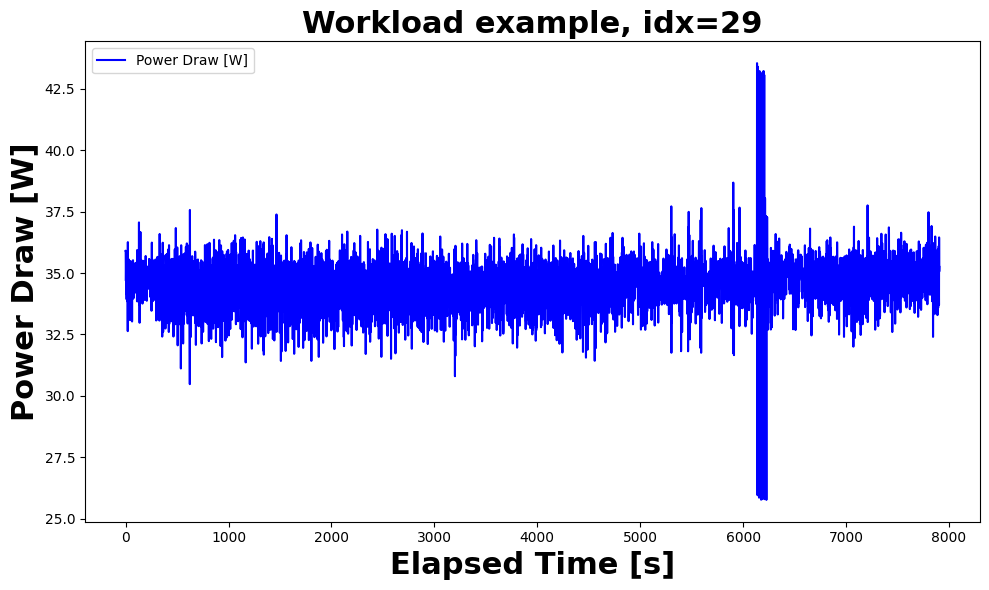

In [56]:
# Create a single figure
plt.figure(figsize=(10, 6))

# Plot power draw
plt.plot(df['timestamp'], df['power_draw_W'], color='blue', label='Power Draw [W]')

# Set labels and title
plt.xlabel('Elapsed Time [s]', fontsize=22, fontweight='bold')
plt.ylabel('Power Draw [W]', fontsize=22, fontweight='bold')
plt.title(f'Workload example, idx={idx}', fontsize=22, fontweight='bold')
plt.legend(loc='upper left')

#lt.figure(figsize=(10, 6)) plt.hist(gpu_utilization, bins=30, color='blue', alpha=0.7, label='GPU Usage') 
#plt.title(f'GPU Usage for Cluster: {cluster_name}', fontsize=24, fontweight='bold') plt.xlabel('GPU Usage (%)', fontsize=22, fontweight='bold') plt.ylabel('Frequency', fontsize=22, fontweight='bold')


output_image_path = os.path.join(".", f'{idx}.png')
plt.savefig(output_image_path, dpi=300)  # You can adjust dpi as needed

plt.tight_layout()
plt.show()


## Memory 

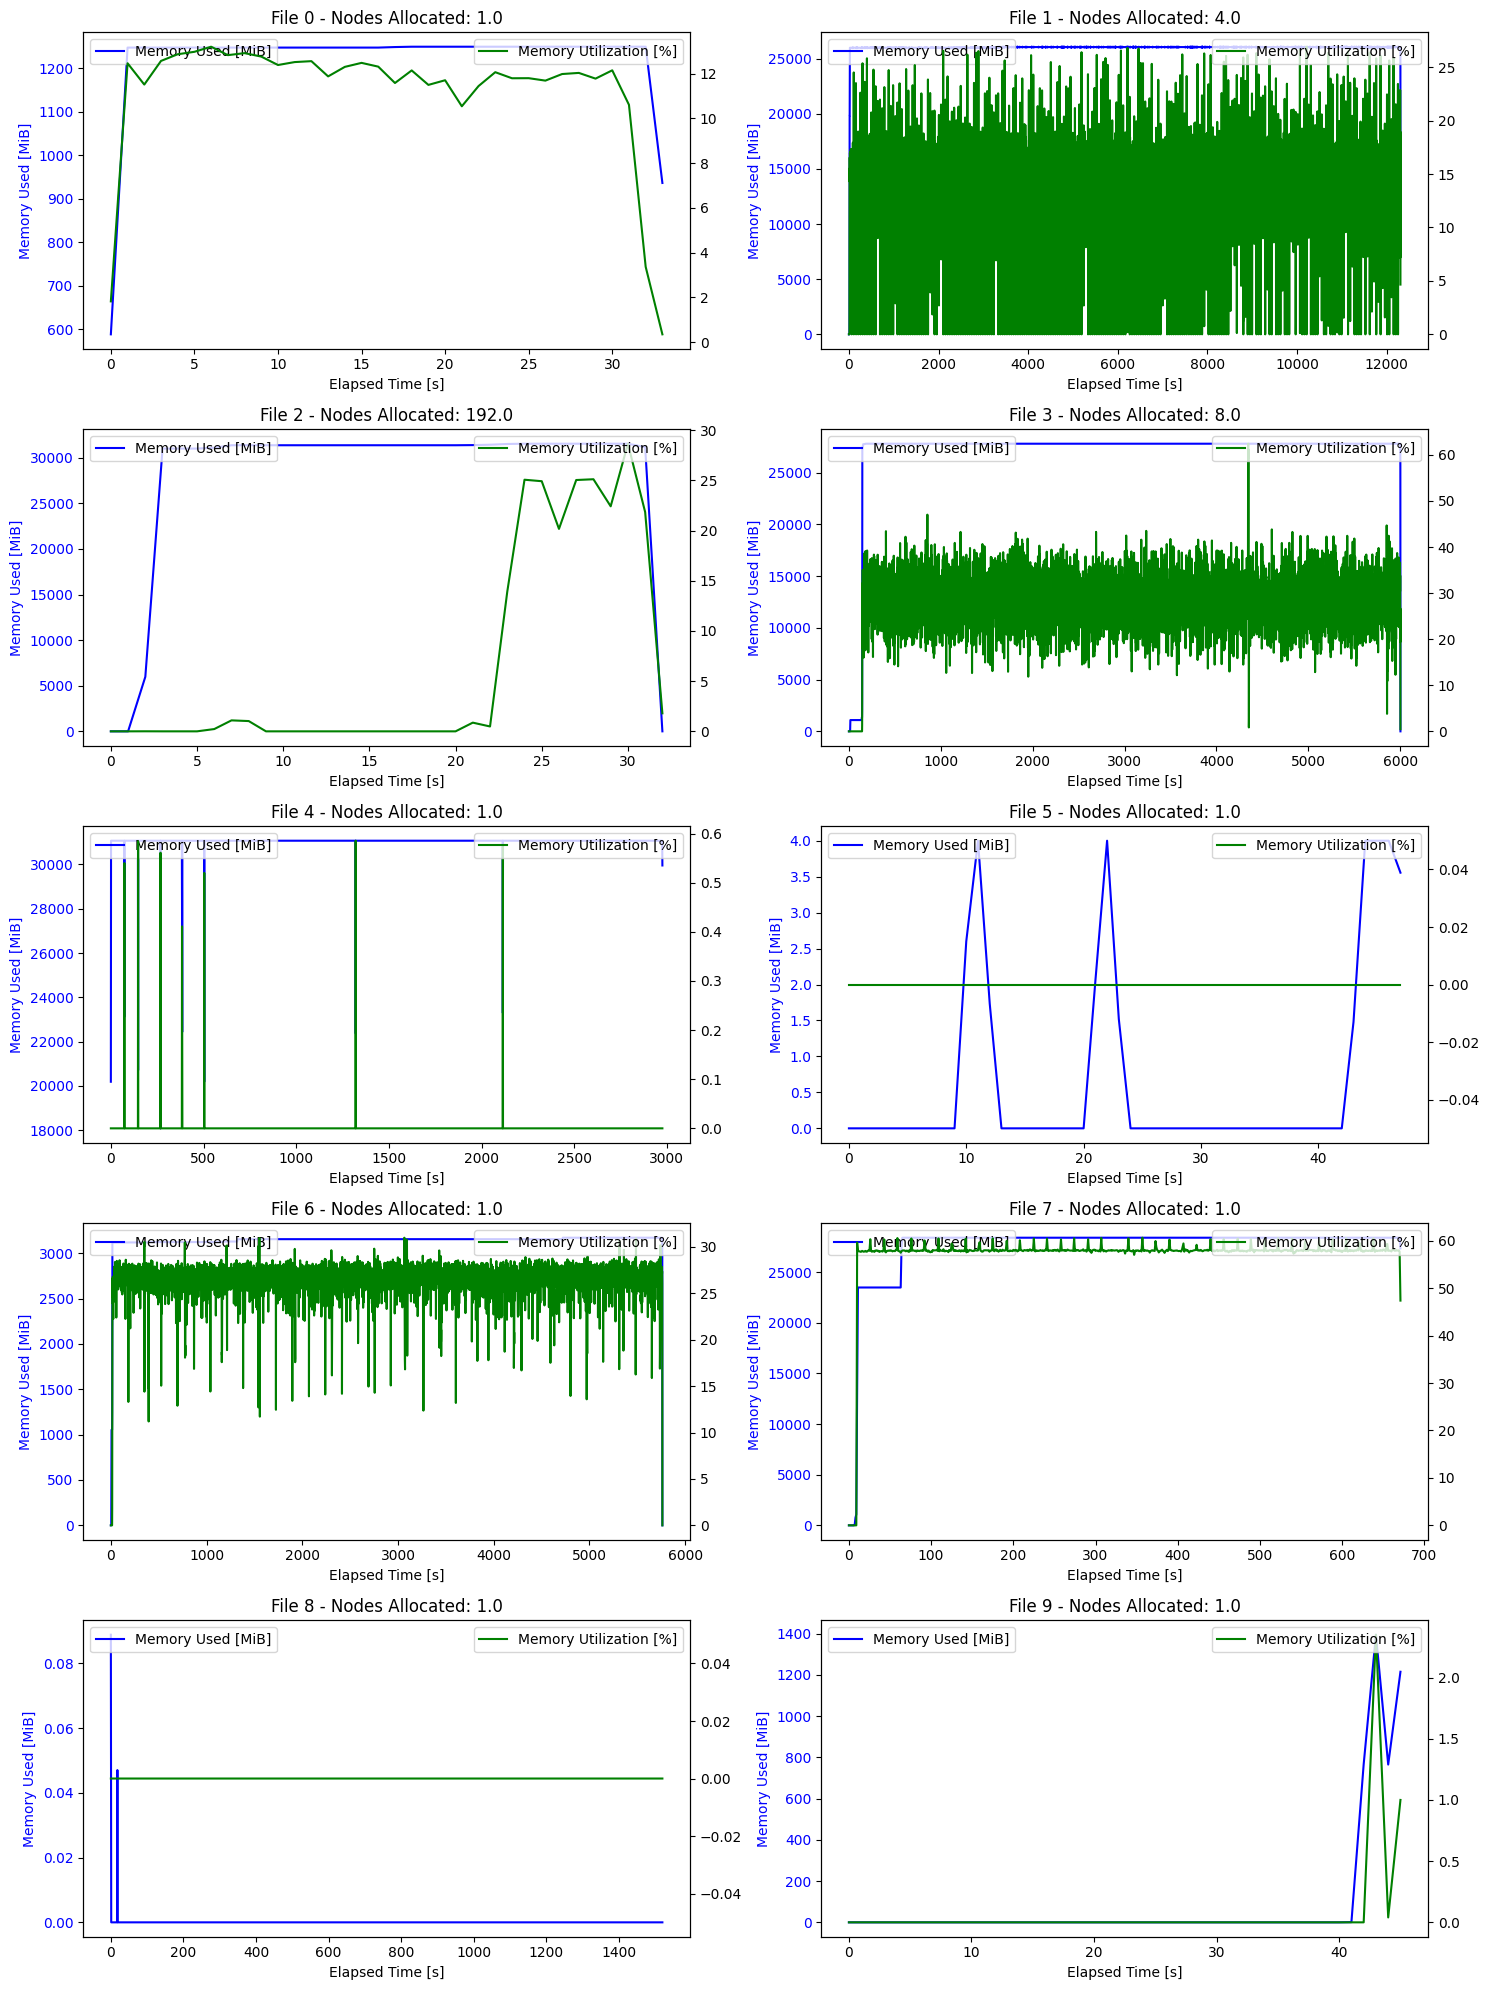

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    # Plot memory used on the primary y-axis
    ax.plot(df['timestamp'], df['memory_used_MiB'], color='blue', label='Memory Used [MiB]')
    ax.set_ylabel('Memory Used [MiB]', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a twin y-axis for utilization and nodes allocated
    ax2 = ax.twinx()
    
    # Plot utilization memory percentage
    ax2.plot(df['timestamp'], df['utilization_memory_pct'], color='green', label='Memory Utilization [%]')
    
    # Add title and include nodes_alloc
    nodes_alloc = df['nodes_alloc'].max()  # You can use max, mean, or other stats
    ax.set_title(f'File {idx} - Nodes Allocated: {nodes_alloc}')
    ax.set_xlabel('Elapsed Time [s]')
    
    # Add legends for both y-axes
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


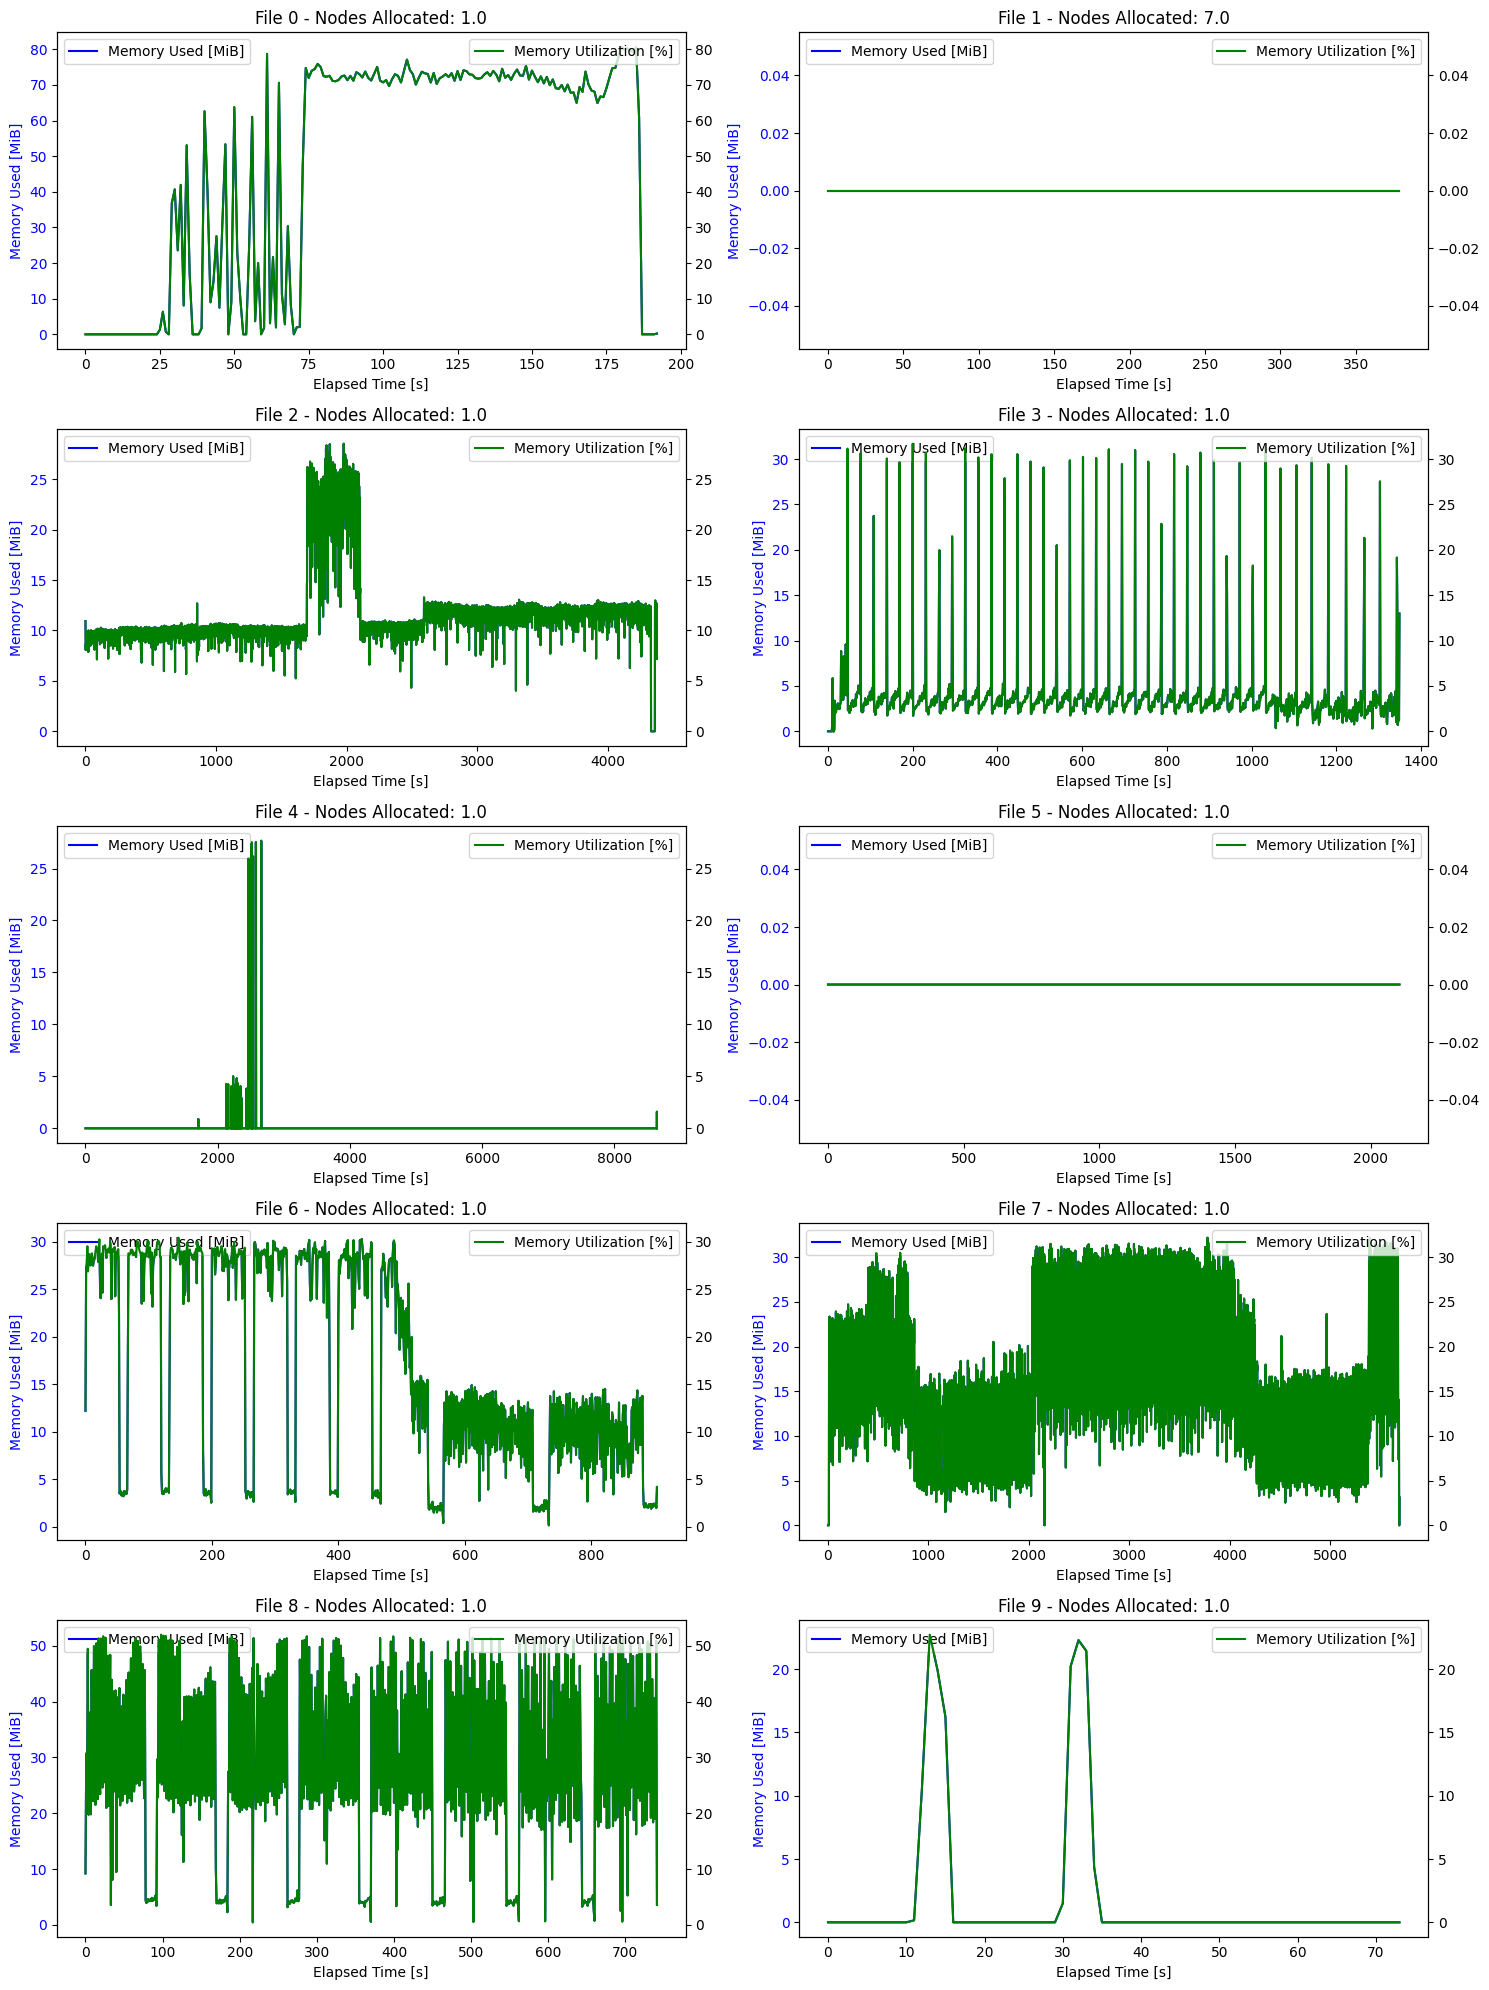

In [58]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    # Plot memory used on the primary y-axis
    ax.plot(df['timestamp'], df['utilization_gpu_pct'], color='blue', label='Memory Used [MiB]')
    ax.set_ylabel('Memory Used [MiB]', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a twin y-axis for utilization and nodes allocated
    ax2 = ax.twinx()
    
    # Plot utilization memory percentage
    ax2.plot(df['timestamp'], df['utilization_gpu_pct'], color='green', label='Memory Utilization [%]')
    
    # Add title and include nodes_alloc
    nodes_alloc = df['nodes_alloc'].max()  # You can use max, mean, or other stats
    ax.set_title(f'File {idx} - Nodes Allocated: {nodes_alloc}')
    ax.set_xlabel('Elapsed Time [s]')
    
    # Add legends for both y-axes
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
